In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sc
import seaborn as sb

### Бернулли

Минимум левой части:0.0037657387763314577


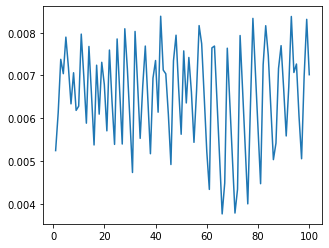

Минимум левой части:0.010945765857437116


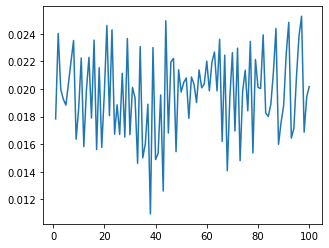

Минимум левой части:0.024096402322188844


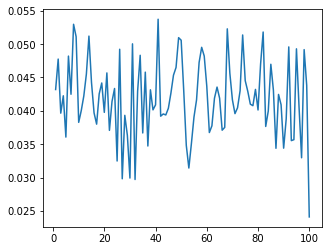

Минимум левой части:0.015333321608412751


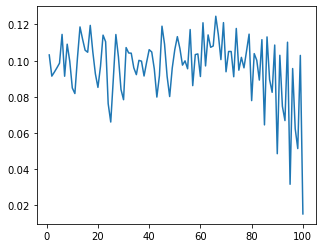

<ipython-input-2-ed4d678efd14>:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.max(np.abs(y * np.sqrt(p * (1 - p)) ** 3 *  np.sqrt(n) / float(sc.bernoulli.stats(p, moments='s'))))
<ipython-input-2-ed4d678efd14>:4: RuntimeWarning: invalid value encountered in true_divide
  return np.max(np.abs(y * np.sqrt(p * (1 - p)) ** 3 *  np.sqrt(n) / float(sc.bernoulli.stats(p, moments='s'))))


Минимум левой части:nan


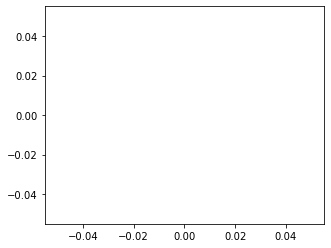

Минимум левой части:0.01533332160840578


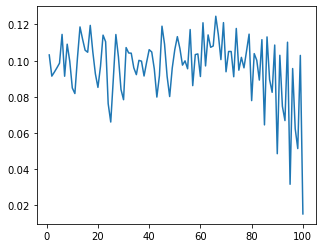

Минимум левой части:0.024096402322184986


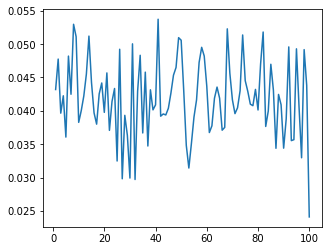

Минимум левой части:0.010945765857435676


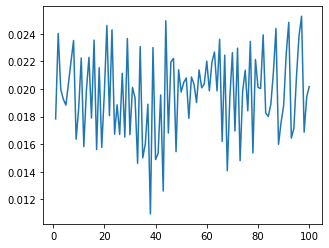

In [2]:
def func(n, p):
    X = np.linspace(-100, 100, 1000)
    y = np.array([sc.binom.cdf(x * np.sqrt(n * p * (1 - p)), n, p, loc = - n * p) - sc.norm.cdf(x) for x in X])
    return np.max(np.abs(y * np.sqrt(p * (1 - p)) ** 3 *  np.sqrt(n) / float(sc.bernoulli.stats(p, moments='s'))))
for p in np.arange(1/10, 9/10, 1/10):
    plt.figure(figsize = (5,4))
    n = np.linspace(1, 100 , 100)
    y = list(map(lambda n: func(n, p), n))
    print('Минимум левой части:' + str(min(y)))
    plt.plot(n, y)
    plt.show()

### Равномерное [0,1]

In [4]:
from scipy.special import comb
def IH_cdf(x, sum_len):
    if x < 0:
        return 0
    if x > sum_len:
        return 1
    return 1 / np.math.factorial(sum_len) * \
            np.sum(np.array([(-1)**i for i in range(int(x) + 1)]) * \
                  comb([sum_len for i in range(int(x) + 1)], [i for i in range(int(x) + 1)]) * \
                  np.array([x - i for i in range(int(x) + 1)])**(sum_len))

Минимум левой части:0.004174077277096022


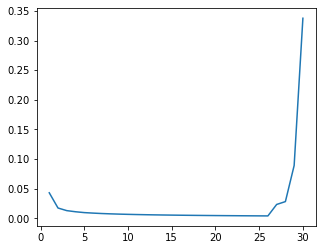

In [20]:
def func(n):
    X = np.linspace(-100, 100, 1000)
    y = np.array([IH_cdf(np.sqrt(n * 1/12) * x + n/2, n) - sc.norm.cdf(x) for x in X])
    return abs(np.max(y)) * (1/12)**(3/2) * np.sqrt(n) / (1/32)
plt.figure(figsize = (5,4))
n = np.arange(1, 31)
y = list(map(lambda n: func(n), n))
print('Минимум левой части:' + str(min(y)))
plt.plot(n, y)
plt.show()

### экспоненциальное 

Минимум левой части:0.0543860470016162


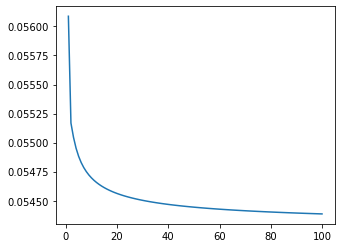

In [24]:
def func(n):
    X = np.linspace(-100, 100, 1000)
    y = np.array([sc.gamma.cdf(np.sqrt(n) * x + n, a = n) - sc.norm.cdf(x) for x in X])
    return np.max(np.abs(y * np.sqrt(n) / float((12/np.e - 2))))
plt.figure(figsize = (5,4))
n = np.linspace(1, 100 , 100)
y = list(map(lambda n: func(n), n))
print('Минимум левой части:' + str(min(y)))
plt.plot(n, y)
plt.show()

### Гамма распределение

Минимум левой части:0.0003275884819464725


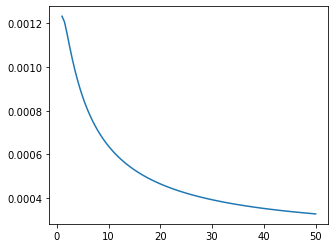

Минимум левой части:0.0005541825072508111


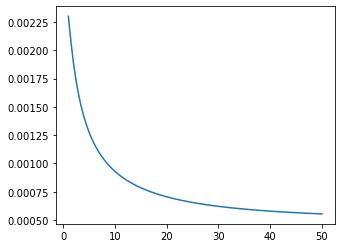

Минимум левой части:0.0007895911838112779


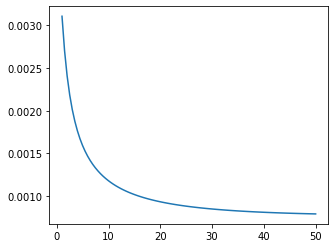

Минимум левой части:0.0010364893440417688


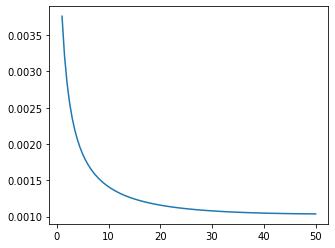

Минимум левой части:0.0012936264310303587


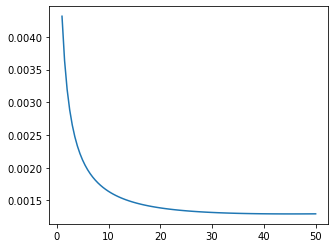

Минимум левой части:0.0015523487436194553


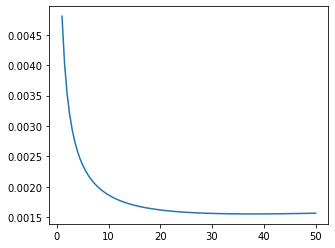

Минимум левой части:0.0018110768300918414


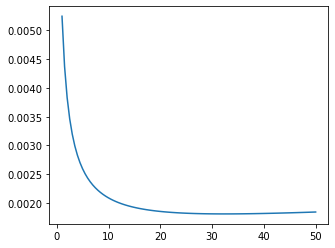

Минимум левой части:0.0020697982089690945


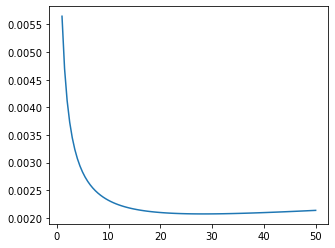

In [4]:
def func(n, k):
    X = np.linspace(-5000, 5000, 1000)
    y = np.array([sc.gamma.cdf(x  * np.sqrt(n * k) + n * k, a = n * k) - sc.norm.cdf(x) for x in X])
    return np.max(np.abs(y * np.sqrt(n) * (k)**(3/2) / float(sc.gamma.stats(a = n * k, moments='s'))))
for k in np.arange(1, 9):
    plt.figure(figsize = (5,4))
    n = np.linspace(1, 50 , 100)
    y = list(map(lambda n: func(n, k), n))
    print('Минимум левой части:' + str(min(y)))
    plt.plot(n, y)
    plt.show()